###逻辑回归-线性可分

#案例：根据学生两门成绩，预测是否被大学录取

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
path = 'E:/ML_NG/02-logistic_regression/ex2data1.txt'
data = pd.read_csv(path,names=['Exam1','Exam2','Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


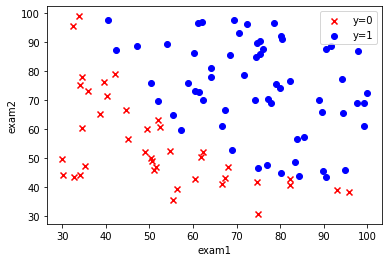

In [15]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

In [16]:
def get_Xy(data):
    
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values
    
    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)
    
    return X,y

In [17]:
X,y = get_Xy(data)

In [18]:
X.shape

(100, 3)

In [19]:
y.shape

(100, 1)

###损失函数

In [31]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [32]:
def costFunction(X,y,theta):
    A = sigmoid(X@theta)
    
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    
    return -np.sum(first + second)/len(X)

In [24]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [33]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [37]:
def gradientDescent(X,y,theta,iters,alpha):
    m = len(X)
    costs = []
    
    for i in range(iters):
        A = sigmoid(X@theta)
        theta = theta -(alpha/m) * X.T @ (A - y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        #if i % 100 ==0:
            #print(cost)
    return costs,theta

In [35]:
alpha = 0.004
iters = 200000

In [38]:
costs,theta_final = gradientDescent(X,y,theta,iters,alpha)

In [40]:
theta_final

array([[-23.77376631],
       [  0.18688441],
       [  0.18043173]])

In [41]:
def predict(X,theta):
    
    prob = sigmoid(X@theta)
    
    return [1 if x>=0.5 else 0 for x in prob]

In [42]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc = np.mean(y_pre == y)

print(acc)

0.86


In [44]:
coef1 = -theta_final[0,0] / theta_final[2,0]
coef2 = -theta_final[1,0] / theta_final[2,0]

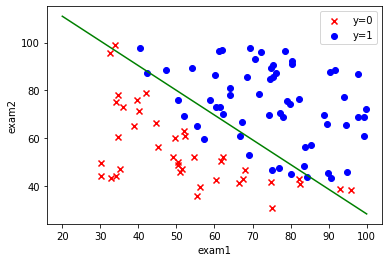

In [47]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='exam1',ylabel='exam2')
ax.plot(x,f,c='g')
plt.show()